In [1]:
@time include("InfectionSim.jl")


 43.995157 seconds (63.26 M allocations: 3.205 GiB, 3.99% gc time)


In [2]:
param = initParams(symptomatic_isolation_prob=0.95, asymptomatic_prob=0.4)

Params
  symptom_dist: LogNormal{Float64}
  Infdistributions: Array{Any}((14,))
  symptomatic_isolation_prob: Float64 0.95
  asymptomatic_prob: Float64 0.4
  pos_test_probs: Array{Float64}((14,)) [0.0, 0.0, 0.0, 0.04114, 0.56264, 0.88718, 0.93326, 0.82036, 0.6034, 0.36936, 0.1924, 0.08972, 0.03924, 0.0165]
  test_delay: Int64 0


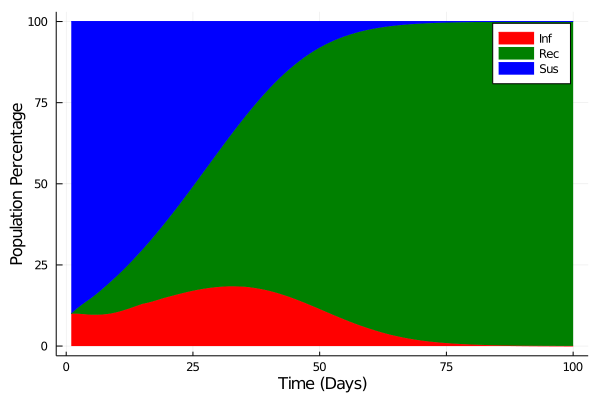

In [3]:
state = initState(repeat(floor.(Int32,[100_000]./14),14), param, N=1_000_000)
action = Action(0.1)
simHist = Simulate(100, state, param, action)
plotHist(simHist, kind=:stack, order="IRS")

In [188]:
N = 1_000_000
# I0 = 10_000
# I = zeros(Int64, length(distributions))
# I[1] = I0
# I = rand(truncated(Normal(1_000,500),0,Inf),14)
# I = floor.(Int,I)
I = ones(Int32,14)*350_000/14

S = N - sum(I)
R = 0

symptomatic_isolation_prob = 0
asymptomatic_prob = 1
param = Params(Bdist, distributions, symptomatic_isolation_prob, asymptomatic_prob, pos_test_probs, 0)

Params
  symptom_dist: LogNormal{Float64}
  Infdistributions: Array{Any}((14,))
  symptomatic_isolation_prob: Int64 0
  asymptomatic_prob: Int64 1
  pos_test_probs: Array{Float64}((14,)) [0.0, 0.0, 0.0, 0.04114, 0.56264, 0.88718, 0.93326, 0.82036, 0.6034, 0.36936, 0.1924, 0.08972, 0.03924, 0.0165]
  test_delay: Int64 0


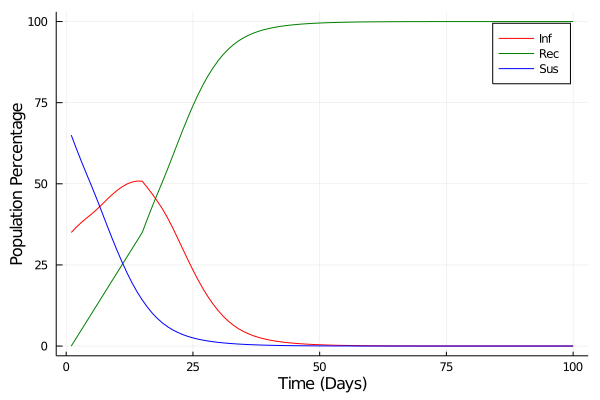

In [231]:
state = State(S,I,R,N)
simHist = Simulate(100, state, param)
plotHist(simHist, kind=:line, order="IRS")